# 分類器の精度

In [17]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# データロード
df = sns.load_dataset("iris")
y_col = "species"
X = df.drop(columns=[y_col])
y = df[y_col]
# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# モデル学習
model = LogisticRegression(penalty="none")
model.fit(X_train, y_train)
# 予測
y_pred = model.predict(X_test)

## 混同行列(confusion matrix)の表示
ConfusionMatrixDisplayを用いてヒートマップの形でconfusionc matrixを出力すると、一目で見やすいグラフを出力してくれる

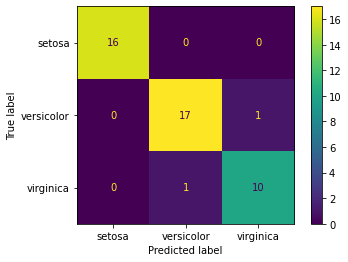

In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

## Accuracy(正解率) 

In [3]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9555555555555556

## Precision

In [4]:
from sklearn.metrics import precision_score
# サンプルデータ
y_true = [1,1,0,1,0,0,1,1]
y_pred = [1,1,1,0,0,1,0,1]
precision_score(y_true, y_pred)

0.6

## Recall

In [5]:
from sklearn.metrics import recall_score
recall_score(y_true, y_pred)

0.6

## Specificity
skleranにspecificiy_scoreは用意されていないので、recallと真偽値が逆の関係にあることを利用して、の真偽を逆にして算出する

In [6]:
# 配列のそれぞれの要素に対して、 != 1 を適用することで真偽値を逆にするテクニック
print(np.array(y_true) != 1)
recall_score(np.array(y_true) != 1, np.array(y_pred) != 1)

[False False  True False  True  True False False]


0.3333333333333333

# 多クラス評価

In [7]:
y_col = "species"
X = df.drop(columns=[y_col])
y = df[y_col]
# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# モデル学習
model = LogisticRegression(penalty="none")
model.fit(X_train, y_train)
# 予測
y_pred = model.predict(X_test)

In [8]:
# 通常
print(precision_score(y_test, y_pred, average=None))

# マクロ平均
print("macro average of precision:",precision_score(y_test, y_pred, average="macro"))
print("macro average of recall:",recall_score(y_test, y_pred, average="macro"))

# マイクロ平均
print("micro average of precision:", precision_score(y_test, y_pred, average="micro"))
print("micro average of precision:",recall_score(y_test, y_pred, average="micro"))

# accuracyとprecision, recall, specificityのmicro平均は同じ値になる!
print("accuracy:",accuracy_score(y_test, y_pred))


[1.         0.94444444 0.90909091]
macro average of precision: 0.9511784511784511
macro average of recall: 0.9511784511784511
micro average of precision: 0.9555555555555556
micro average of precision: 0.9555555555555556
accuracy: 0.9555555555555556


# Precision Recall Curve

In [10]:
# 患者の情報と、その感情が心臓病を患っているかどうかのデータ(kaggleのデータ)
df = pd.read_csv("heart_preprocessed.csv")
y_col = "target"
X = df.drop(columns=[y_col])
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# モデル構築(データの前処理後のcsvファイルを持ちている)
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

In [14]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])

Text(0.5, 1.0, 'Precision Recall Curve')

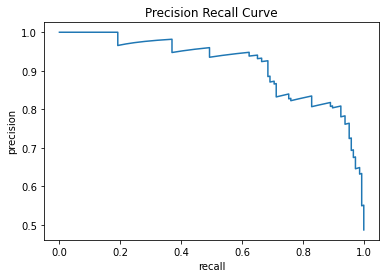

In [20]:
plt.plot(recall, precision)
plt.xlabel("recall")
plt.ylabel("precision")
plt.title("Precision Recall Curve")

## F値

In [26]:
from sklearn.metrics import f1_score
y_true = [1,0,0,1,0,0,1,1]
y_pred = [1,1,1,0,0,1,0,1]
f_score = f1_score(y_true, y_pred)

# 調和平均と一致しているかどうかをチェックする
from scipy.stats import hmean
recall = recall_score(y_true, y_pred)
precision= precision_score(y_true, y_pred)
hm = hmean([recall, precision])

print(f_score)
print(hm)

0.4444444444444445
0.4444444444444444
